In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib. pyplot as plt

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [7]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 12 categorical variables

The categorical variables are : ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']


In [8]:
df[categorical]

,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,Solar,NaN,NaN,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN
3,IND,India,AGARTALA GT,IND0000001,Gas,NaN,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,Coal,Oil,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,Coal,Oil,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN
905,IND,India,ZAWAR MINES,WRI1019901,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN


In [9]:
df.other_fuel1.value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [10]:
df.other_fuel2.value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [11]:
df.owner.value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [12]:
df.source.value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [13]:
df.gppd_idnr.value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [14]:
df.geolocation_source.value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [15]:
df.generation_data_source.value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [16]:
df.country.value_counts()

IND    907
Name: country, dtype: int64

In [17]:
df.name.value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [18]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# find categorical variables

numerical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 12 categorical variables

The categorical variables are : ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']


In [20]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [21]:
#drop unwanted column names
df.drop(columns=["country","country_long","name","url","owner","gppd_idnr","generation_data_source","source"],inplace=True,axis=1)

In [22]:
df.drop(columns=["other_fuel2","other_fuel1"],inplace=True,axis=1)

In [23]:
df.drop(columns=["other_fuel3"],inplace=True,axis=1)

In [24]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,NaN
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,NaN


<AxesSubplot:>

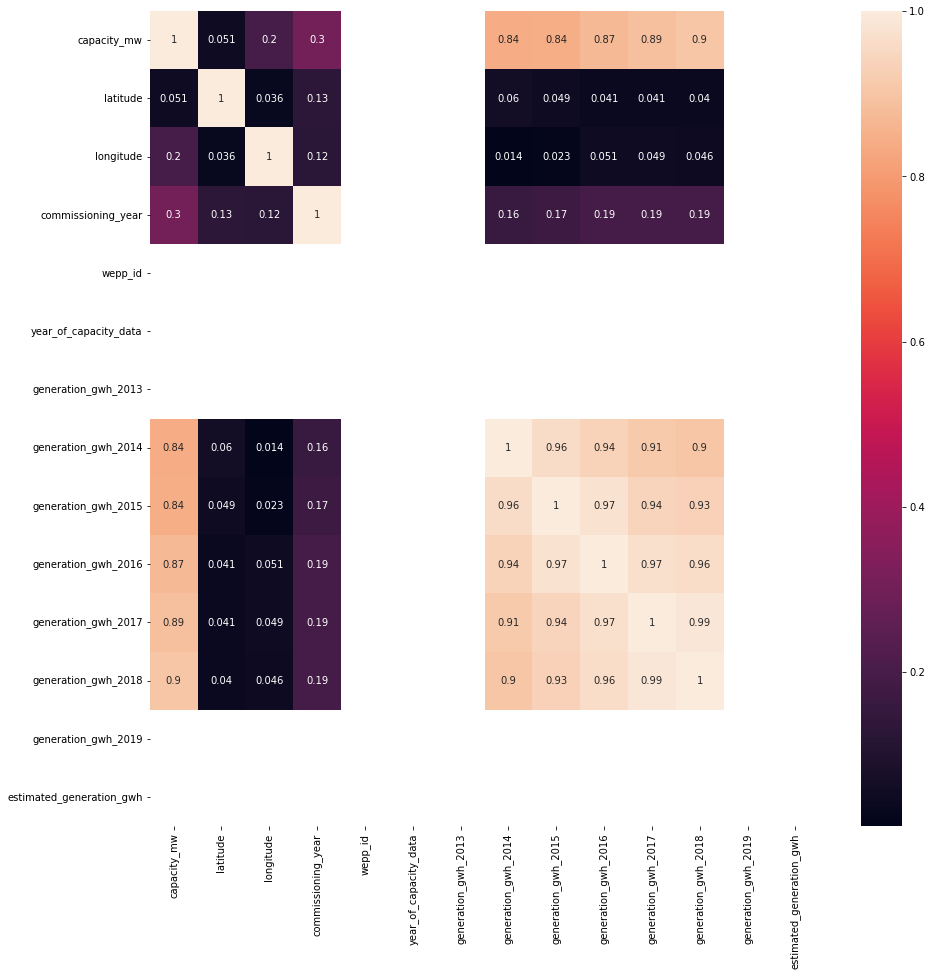

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [26]:
df["primary_fuel"].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [27]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 2 categorical variables

The categorical variables are : ['primary_fuel', 'geolocation_source']


In [28]:
#using encoding method.s convert categorical value
from sklearn import preprocessing
label=preprocessing.LabelEncoder()
df["primary_fuel"]=label.fit_transform(df["primary_fuel"])
df["geolocation_source"]=label.fit_transform(df["geolocation_source"])


In [29]:
df[df.columns[0:]].corr()["primary_fuel"][:]

capacity_mw                -0.380395
latitude                   -0.010530
longitude                  -0.359060
primary_fuel                1.000000
commissioning_year         -0.336501
geolocation_source         -0.420263
wepp_id                          NaN
year_of_capacity_data            NaN
generation_gwh_2013              NaN
generation_gwh_2014        -0.405019
generation_gwh_2015        -0.393335
generation_gwh_2016        -0.408951
generation_gwh_2017        -0.421736
generation_gwh_2018        -0.421518
generation_gwh_2019              NaN
estimated_generation_gwh         NaN
Name: primary_fuel, dtype: float64

In [30]:
df[df.columns[0:]].corr()["capacity_mw"][:]

capacity_mw                 1.000000
latitude                    0.051309
longitude                   0.197129
primary_fuel               -0.380395
commissioning_year          0.304087
geolocation_source          0.183419
wepp_id                          NaN
year_of_capacity_data            NaN
generation_gwh_2013              NaN
generation_gwh_2014         0.839094
generation_gwh_2015         0.844352
generation_gwh_2016         0.870620
generation_gwh_2017         0.886673
generation_gwh_2018         0.901918
generation_gwh_2019              NaN
estimated_generation_gwh         NaN
Name: capacity_mw, dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   capacity_mw               907 non-null    float64
 1   latitude                  861 non-null    float64
 2   longitude                 861 non-null    float64
 3   primary_fuel              907 non-null    int64  
 4   commissioning_year        527 non-null    float64
 5   geolocation_source        907 non-null    int64  
 6   wepp_id                   0 non-null      float64
 7   year_of_capacity_data     519 non-null    float64
 8   generation_gwh_2013       0 non-null      float64
 9   generation_gwh_2014       398 non-null    float64
 10  generation_gwh_2015       422 non-null    float64
 11  generation_gwh_2016       434 non-null    float64
 12  generation_gwh_2017       440 non-null    float64
 13  generation_gwh_2018       448 non-null    float64
 14  generation

In [32]:
#all feature are positively realted to capacity_mw ,negatively corelated to powerfuel
#lets remove 3 columns since it has no relation with output
df.drop(columns=["wepp_id","year_of_capacity_data","generation_gwh_2013","generation_gwh_2019","estimated_generation_gwh"],inplace=True,axis=1)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='generation_gwh_2015'>

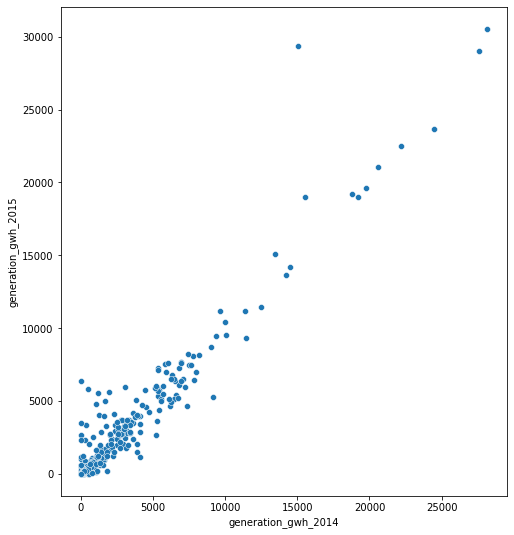

In [33]:
#from heat map. there i high chance of multicolinearity exists
plt.figure(figsize=(8,9))
sns.scatterplot(x="generation_gwh_2014",y="generation_gwh_2015",data=df)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='generation_gwh_2016'>

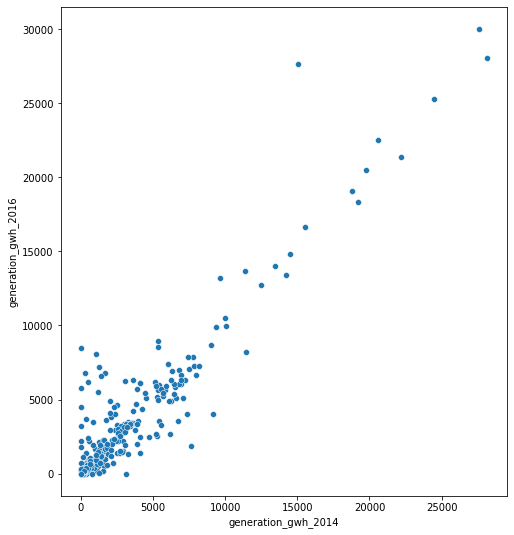

In [34]:
plt.figure(figsize=(8,9))
sns.scatterplot(x="generation_gwh_2014",y="generation_gwh_2016",data=df)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='generation_gwh_2017'>

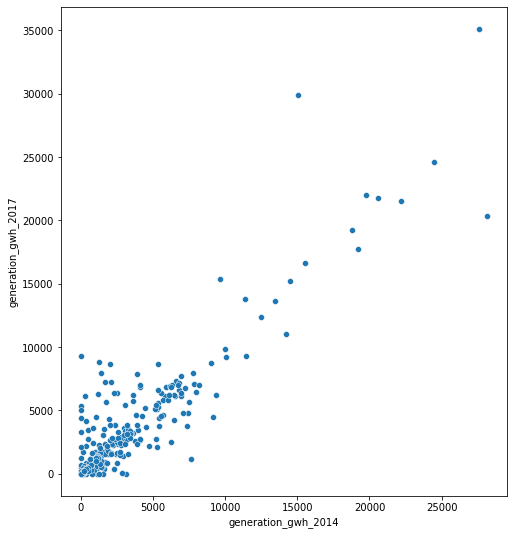

In [35]:
plt.figure(figsize=(8,9))
sns.scatterplot(x="generation_gwh_2014",y="generation_gwh_2017",data=df)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='generation_gwh_2018'>

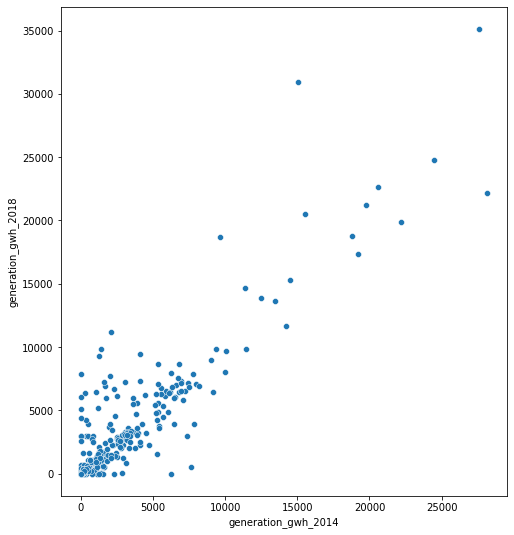

In [36]:
plt.figure(figsize=(8,9))
sns.scatterplot(x="generation_gwh_2014",y="generation_gwh_2018",data=df)

In [37]:
#to avoid multicolinearity remove these columns since it has comparitively less corelation with output
df.drop(columns=["generation_gwh_2016","generation_gwh_2017"],inplace=True,axis=1)

In [38]:
#remove null values
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
geolocation_source       0
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2018    459
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    int64  
 4   commissioning_year   527 non-null    float64
 5   geolocation_source   907 non-null    int64  
 6   generation_gwh_2014  398 non-null    float64
 7   generation_gwh_2015  422 non-null    float64
 8   generation_gwh_2018  448 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 63.9 KB


In [40]:
#fill null values
df["capacity_mw"].fillna(df["capacity_mw"].mean(),inplace=True)

In [41]:
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)
df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].mean(),inplace=True)
df["commissioning_year"].fillna(df["commissioning_year"].mean(),inplace=True)
df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].mean(),inplace=True)
df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].mean(),inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode(),inplace=True)

In [42]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2018    0
dtype: int64

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


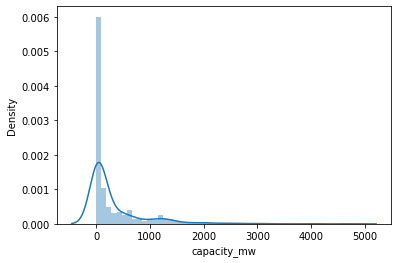

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


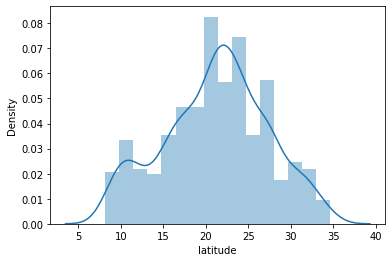

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


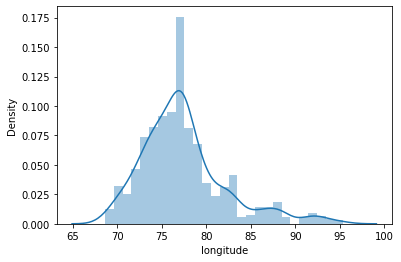

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


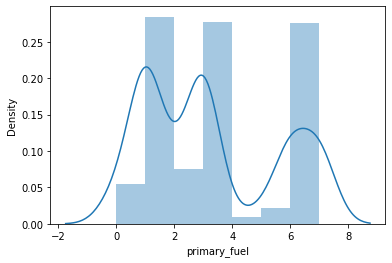

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


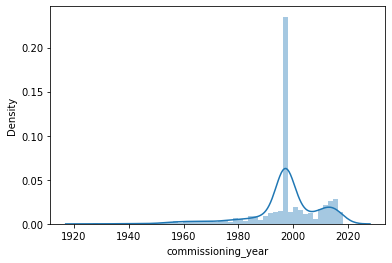

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


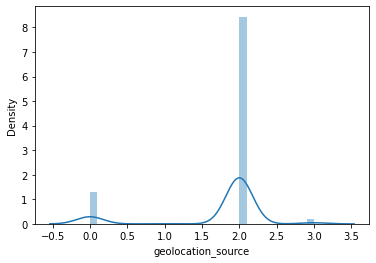

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


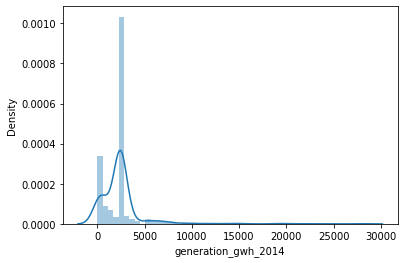

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


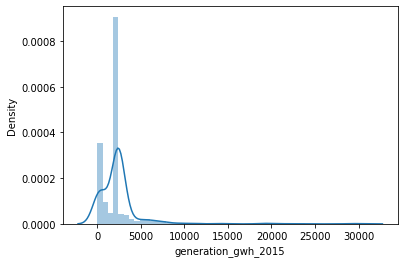

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


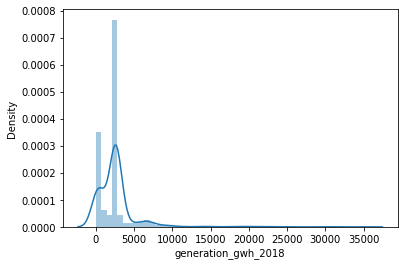

In [43]:
for i in df.columns:
    sns.distplot(df[i])
  
    plt.show()

In [44]:
#few columns is not in normal distribution lets need to convert to standard form

In [45]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,3.206174,1997.091082,1.754135,2431.823590,2428.226946,2600.804099
std,590.085456,6.079148,4.812291,2.280652,13.016360,0.700183,2665.338608,2859.349132,3030.808041
min,0.000000,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1.000000,1997.091082,2.000000,1211.362750,916.000000,824.842340
50%,59.200000,21.281800,76.979200,3.000000,1997.091082,2.000000,2431.823590,2428.226946,2600.804099
75%,385.250000,25.176450,79.206100,6.000000,2003.000000,2.000000,2431.823590,2428.226946,2600.804099
max,4760.000000,34.649000,95.408000,7.000000,2018.000000,3.000000,28127.000000,30539.000000,35136.000000


In [46]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2018    0
dtype: int64

In [47]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
primary_fuel           0.472251
commissioning_year    -1.399359
geolocation_source    -1.920302
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2018    4.937907
dtype: float64

In [48]:
from scipy import stats

In [49]:
df["generation_gwh_2014"]=stats.yeojohnson(df["generation_gwh_2014"])[0]
df["capacity_mw"]=stats.yeojohnson(df["capacity_mw"])[0]
df["generation_gwh_2015"]=stats.yeojohnson(df["generation_gwh_2015"])[0]
df["generation_gwh_2018"]=stats.yeojohnson(df["generation_gwh_2018"])[0]


In [50]:
df.skew()
#skewness removed

capacity_mw            0.022164
latitude              -0.149698
longitude              1.141881
primary_fuel           0.472251
commissioning_year    -1.399359
geolocation_source    -1.920302
generation_gwh_2014    0.123226
generation_gwh_2015    0.074582
generation_gwh_2018    0.000783
dtype: float64

In [51]:
#remove outliers
from scipy.stats import zscore

In [52]:
z=np.abs(zscore(df))

In [53]:
z

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2018
0,1.695767,1.149805,0.878280,1.225688,1.069162e+00,1.077648,0.287071,0.311796,0.321938
1,0.193694,0.587311,0.593788,0.967877,1.747794e-14,0.351338,0.287071,0.311796,0.321938
2,0.292337,0.116179,1.682394,1.664401,1.747794e-14,0.351338,0.287071,0.311796,0.321938
3,0.360998,0.439989,2.889052,0.529164,5.310801e-01,0.351338,0.864800,0.579716,0.771699
4,1.649503,0.125479,1.027976,0.967877,1.376637e+00,0.351338,0.537628,1.385476,1.552482
...,...,...,...,...,...,...,...,...,...
902,1.593509,0.806975,0.022477,0.967877,1.453505e+00,0.351338,0.287071,2.251373,0.716996
903,1.615576,1.366853,0.145644,1.225688,1.747794e-14,2.506634,0.287071,0.311796,0.321938
904,0.522773,0.974707,0.391673,1.664401,1.747794e-14,0.351338,0.287071,0.311796,0.321938
905,0.086915,0.518793,0.772866,0.967877,1.747794e-14,0.351338,0.287071,0.311796,0.321938


In [54]:
df=df[(z<3).all(axis=1)]

In [55]:
df.shape
#60 records as been removed

(859, 9)

In [56]:
#separate input and output value
x=df.drop(columns="primary_fuel")
x=df.drop(columns="capacity_mw")

y=df[["primary_fuel","capacity_mw"]]

In [57]:
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import StandardScaler
lr=StandardScaler()
x=lr.fit_transform(x)

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [60]:
LR=LinearRegression()
LR=LR.fit(x_train,y_train)
y_Ptrain=LR.predict(x_train)
y_Ptest=LR.predict(x_test)
score1=r2_score(y_train,y_Ptrain)
score2=mean_absolute_error(y_train,y_Ptrain)
score3=mean_squared_error(y_train,y_Ptrain)
print(score1)
print(score2)
print(score3)

0.7040940923773319
0.5064234070556815
0.7290963722301751


In [62]:
from sklearn.model_selection import cross_val_score,GridSearchCV
trainscore=r2_score(y_Ptrain,y_train)
testscore=r2_score(y_test,y_Ptest)
for i in range(2,10):
    crossval=cross_val_score(LR,x_train,y_train,cv=i)
    cvmean=crossval.mean()
    print("At cv= {}, cross mean is {},and testscore={}".format(i,cvmean,testscore))

At cv= 2, cross mean is 0.69527342603054,and testscore=0.6634372612488362
At cv= 3, cross mean is 0.693112534583845,and testscore=0.6634372612488362
At cv= 4, cross mean is 0.6960998874560886,and testscore=0.6634372612488362
At cv= 5, cross mean is 0.6867628195355605,and testscore=0.6634372612488362
At cv= 6, cross mean is 0.6851153410207501,and testscore=0.6634372612488362
At cv= 7, cross mean is 0.6830151289133958,and testscore=0.6634372612488362
At cv= 8, cross mean is 0.6863057771335779,and testscore=0.6634372612488362
At cv= 9, cross mean is 0.6821934348762851,and testscore=0.6634372612488362


In [ ]:
#cv=9 it has less difference wih test score

In [64]:
from sklearn.linear_model import Lasso
ls=Lasso()
params = {'alpha': [0.001, 0.01, 0.1, 1, 10],'random_state':list(range(1,10))}
lsm = GridSearchCV(ls, params)

lsm.fit(x_train, y_train)

print(lsm.best_params_)
print(lsm.best_score_)

{'alpha': 0.001, 'random_state': 1}
0.6867691848826384


In [65]:
ls=Lasso(alpha=0.001,random_state=1)
lsm.fit(x_train,y_train)
y_pred=lsm.predict(x_test)
score=r2_score(y_test,y_pred)
score1=mean_absolute_error(y_test,y_pred)
score2=mean_squared_error(y_test,y_pred)
print(score)
print(score1)
print(score2)

0.6636378601663242
0.5390903338633463
0.8064895955907104


In [67]:
crossvalue=cross_val_score(lsm,x_train,y_train,cv=9)
cvmean=crossvalue.mean()
cvmean

0.6817069976478742

In [69]:
from sklearn.ensemble import RandomForestRegressor
rm=RandomForestRegressor()
import warnings
warnings.filterwarnings("ignore")
para={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rmg=GridSearchCV(rm,para)
rmg.fit(x_train,y_train)
rmg.best_params_

{'criterion': 'mae', 'max_features': 'log2'}

In [70]:
rm=RandomForestRegressor(criterion="mae",max_features="log2")
rmg.fit(x_train,y_train)
y_pred=rmg.predict(x_test)
score=r2_score(y_test,y_pred)
score1=mean_absolute_error(y_test,y_pred)
score2=mean_squared_error(y_test,y_pred)

In [71]:
print(score)
print(score1)
print(score3)

0.9040276398157604
0.2656941202892278
0.7290963722301751


In [72]:
crossvalue=cross_val_score(rmg,x_train,y_train,cv=9)
crossmean=crossvalue.mean()
print(crossmean)

0.8906417853214345


In [73]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)
pred=dt.predict(x_test)
score=r2_score(y_test,pred)
score1=mean_absolute_error(y_test,pred)
score2=mean_squared_error(y_test,pred)

In [74]:
print(score1)
print(score2)
print(score)

0.3128251367716392
0.4324199239120158
0.8196508176169716


In [75]:
crossvalue=cross_val_score(rmg,x_train,y_train,cv=9)
crossmean=crossvalue.mean()
print(crossmean)

0.8905600166962565


In [77]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
kn.fit(x_train, y_train)
pred=kn.predict(x_test)
score=r2_score(y_test,pred)
score

0.7861625296048763

In [78]:
crossval=cross_val_score(kn,x_train,y_train,cv=2)
cvmean=crossval.mean()
cvmean

0.7967660408101149

In [79]:
#Among 5 Randomforest regressor is the best regressor.gives better score
import pickle
file_name="Global power"
pickle.dump(rmg,open(file_name,"wb"))